**Simon's algorithm**

is a quantum algorithm that solves a specific problem exponentially faster than any known classical algorithm.
It demonstrates the power of quantum computation and serves as a foundation for more complex quantum algorithms.

**The Simon Problem**

We have a function f that takes an n-bit binary string and returns another n-bit binary string.
This function has a special property:

for any pair of inputs x and y, f(x) = f(y) if and only if x = y ⊕ s ,

where 's' is a "secret" n-bit binary string, and ⊕ is the bitwise XOR operation.

Our goal is to find s.

In simple words, Simon's Algorithm finds a secret string s that satisfies 𝑓 (𝑥) = 𝑓 (𝑥 ⊕ 𝑠)


**Complexity**

The quantum algorithm solves the problem in O(n) steps, while the best known classical algorithm requires O(2^(n/2)) steps.

Measurement results: {'011': 2453, '001': 2482, '010': 2537, '000': 2552}


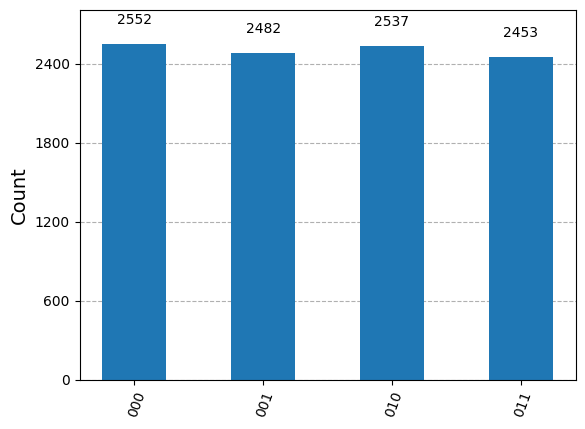

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def simon_oracle(s):
    """Create the oracle U_f for Simon's problem, given the secret string s."""
    n = len(s)
    qc = QuantumCircuit(n * 2)
    # Apply CNOT gates between pairs of qubits where s[i] = 1
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(i, i + n)
    
    return qc

def simon_circuit(n, secret_string):
    """Simon algorithm circuit to find the secret string."""
    
    # Create a Quantum Circuit with n qubits for input and n qubits for output
    qc = QuantumCircuit(2 * n, n)
    # Step 1: Apply Hadamard gates to the first n qubits (input register)
    qc.h(range(n))
    # Step 2: Apply the oracle (U_f) to the qubits
    oracle = simon_oracle(secret_string)
    qc.compose(oracle, inplace=True)
    # Step 3: Apply Hadamard gates again to the first n qubits
    qc.h(range(n))
    # Step 4: Measure the first n qubits (input register)
    qc.measure(range(n), range(n))
    
    return qc

# Set up the problem
n = 3  # Number of qubits (example with 3 qubits)
secret_string = '110'  # Simulated secret string (this would be unknown in a real scenario)

# Create the Simon circuit
qc = simon_circuit(n, secret_string)

# Set up the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Run the simulation
job = simulator.run(transpiled_qc, shots=10024)
result = job.result()

# Get the measurement results
counts = result.get_counts(qc)
print("Measurement results:", counts)

# Visualize the results
display(plot_histogram(counts))

